In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import os

%matplotlib inline
mpl.rcParams["axes.labelsize"] = 18
mpl.rcParams["axes.titlesize"] = 12
mpl.rcParams["xtick.labelsize"] = 14
mpl.rcParams["ytick.labelsize"] = 14
mpl.rcParams["lines.linewidth"] = 2
mpl.rcParams["legend.fontsize"] = 8
mpl.rcParams["xtick.direction"] = "in"
mpl.rcParams["ytick.direction"] = "in"
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["image.cmap"] = "viridis"

THIS_DIR = os.path.dirname(os.path.abspath("__file__"))
ROOT_DIR = os.path.dirname(os.path.dirname(THIS_DIR))
DATA_DIR = os.path.join(ROOT_DIR,"data")
FIGS_DIR = os.path.join(ROOT_DIR,"reports","figures")

In [11]:
sources = ["AP","ABC","CBS","CNN","DailyMail","Express","Fox","Guardian","Mirror","NYT","Reuters"]
df_ntr = pd.read_parquet(os.path.join(DATA_DIR,"processed","All_n10.parquet"))
r_avg_system = df_ntr["Resonance"].mean()
n_avg_system = df_ntr["Novelty"].mean()

sources_dfs = []
for source in sources:
    df_filter = df_ntr.query(f"Source == '{source}'")
    r_avg = df_filter["Resonance"].mean()
    n_avg = df_filter["Novelty"].mean()
    diff_r_avg = r_avg - r_avg_system
    diff_n_avg = n_avg - n_avg_system
    sources_dfs.append(pd.DataFrame({"Source":source,"diff_r_avg":diff_r_avg,"diff_n_avg":diff_n_avg}, index=[0]))

df = pd.concat(sources_dfs, ignore_index=True)
df.round(4).head(11)

,Source,diff_r_avg,diff_n_avg
0,AP,-0.0037,0.6715
1,ABC,0.0012,0.3408
2,CBS,0.0036,0.0206
3,CNN,0.0095,0.1845
4,DailyMail,0.0032,0.3072
5,Express,0.0093,-0.1994
6,Fox,0.0017,-0.1596
7,Guardian,-0.0140,0.0546
8,Mirror,0.0053,-0.0003
9,NYT,-0.0154,-0.0388


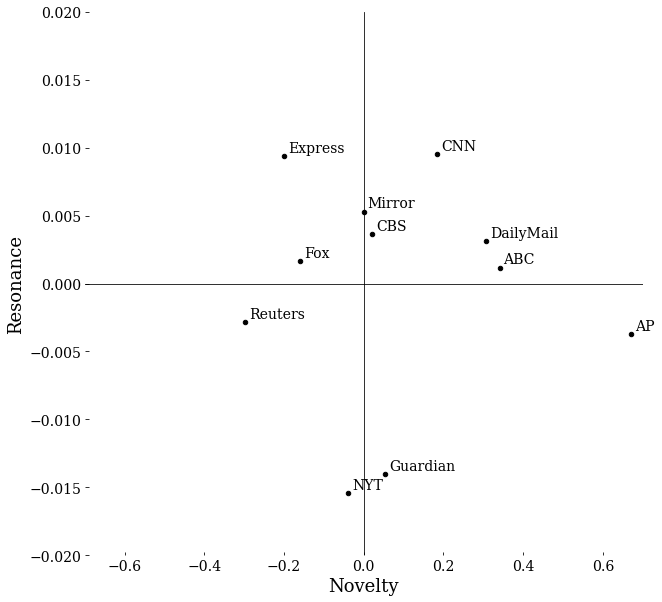

In [12]:
def plot_diff_r_n(df):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(df['diff_n_avg'],df['diff_r_avg'],c='k', alpha=1,s=20)
    for i, txt in enumerate(df['Source']):
        ax.annotate(txt, (df['diff_n_avg'][i]+0.01, df['diff_r_avg'][i]+0.0003), fontsize=14)
    #add a line to y=0 and x=0
    ax.axhline(y=0, color='k', lw=0.8)
    ax.axvline(x=0, color='k', lw=0.8)
    #make x range from -0.02 to 0.02
    ax.set_xlim(-0.7, 0.7)
    #make y range from -0.7 to 0.7
    ax.set_ylim(-0.02, 0.02)
    # remove axes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)


    ax.set_xlabel('Novelty')
    ax.set_ylabel('Resonance')
    plt.show()
    return fig

fig = plot_diff_r_n(df)
fig.savefig(os.path.join(FIGS_DIR, "source_compass", f"Source_compass.png"), format="png", dpi=100, bbox_inches="tight")